0
False
1
True


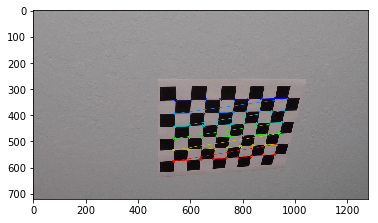

2
True


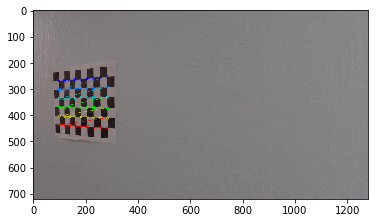

3
True


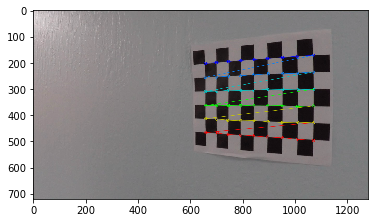

4
True


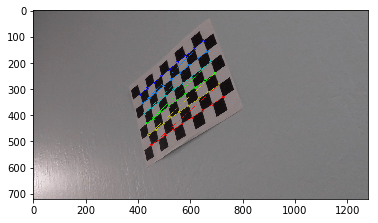

5
True


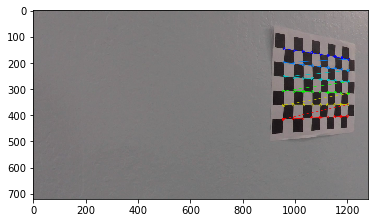

6
True


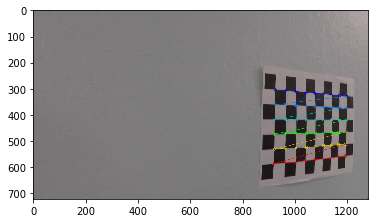

7
True


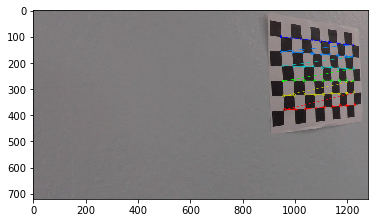

8
True


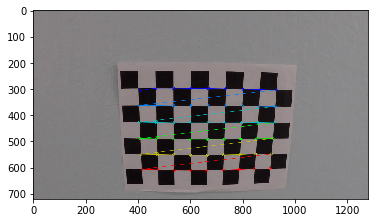

9
True


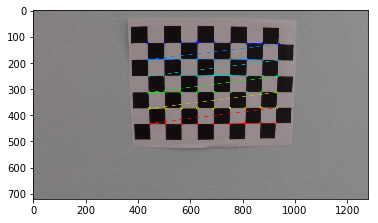

10
True


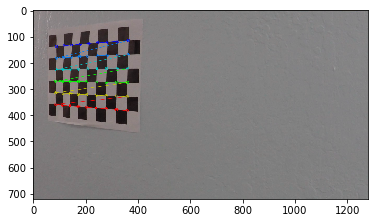

11
True


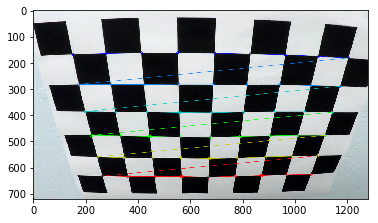

12
True


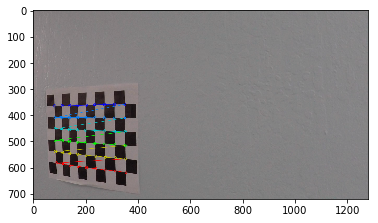

13
True


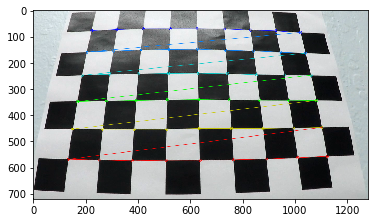

14
False
15
False
16
True


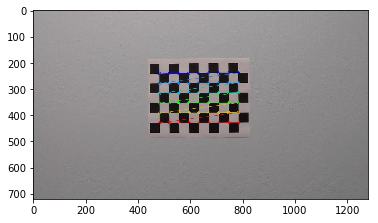

17
True


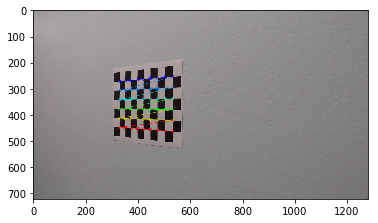

18
True


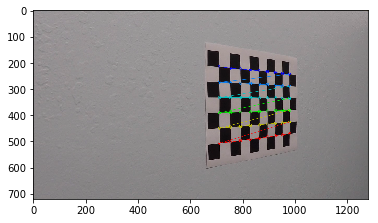

19
True


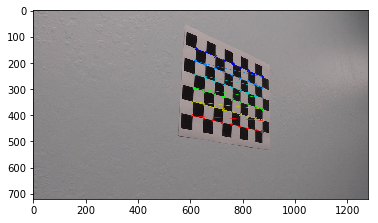

In [15]:
# In this notebook we will create a function that will undistort each image
import numpy as np
import cv2
import glob
from matplotlib import pyplot as plt
#%matplotlib qt

# Prepare the object points (0,0,0), (1, 0, 0), .. , (8, 4, 0)
objp = np.zeros( (6*9, 3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1, 2)

# Create an array to store object points and image points
objpoints = []
imgpoints = []

# List of calibration images
images = glob.glob("C:/Users/lenovo/Documents/SDCND/CarND-Advanced-Lane-Lines/camera_cal/*.jpg")
# Loop through all images and search for chessboard corners
for k, imagepath in enumerate(images):
    print(k)
    img = cv2.imread(imagepath)
    # convert to gray
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (9, 6), None)
    print(ret)
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        cv2.drawChessboardCorners(img, (9, 6), corners, ret)
        plt.imshow(img, cmap = "gray"), plt.show()





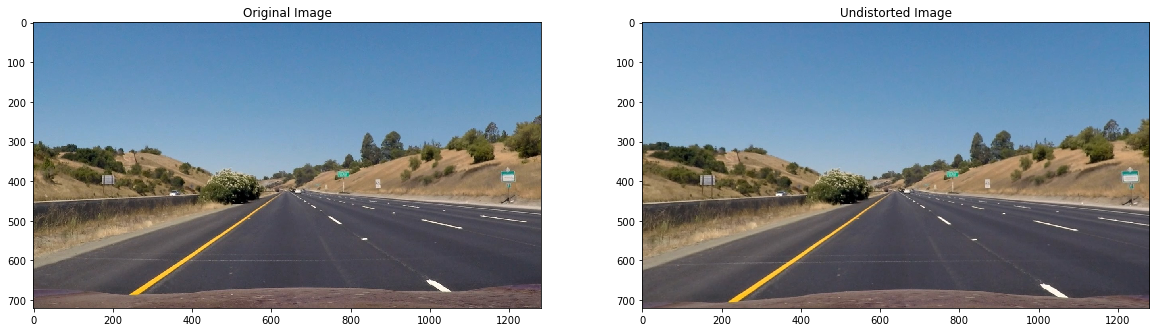

In [106]:
import pickle
%matplotlib inline

img_test = cv2.cvtColor(cv2.imread("Images/test_images/straight_lines1.jpg"), cv2.COLOR_BGR2RGB)
img_size = (img_test.shape[1], img_test.shape[0])

# Get distortion coefficients and calibration matrix
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)
dst = cv2.undistort(img_test, mtx, dist, None, mtx)
cv2.imwrite("Images/test_images/straight_lines1_undistorted.jpg", dst)
# Save the matrix and coefficients
dist_pickle = {}
dist_pickle["Camera_Matrix"] = mtx
dist_pickle["Distortion_Coefficients"] = dist
pickle.dump(dist_pickle, open("dist_pickle.p", "wb"))

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
ax1.set_title("Original Image")
ax1.imshow(img_test, cmap = "gray")
ax2.set_title("Undistorted Image")
ax2.imshow(dst, cmap = "gray")

def undistort(img):
    with open("C:/Users/lenovo/Documents/SDCND/Advanced-Lane-Finding/dist_pickle.p", "rb") as fname:
        dp = pickle.load(fname)
        mtx = dp["Camera_Matrix"] 
        dist = dp["Distortion_Coefficients"]
        dst = cv2.undistort(img, mtx, dist, None ,mtx)
        return dst

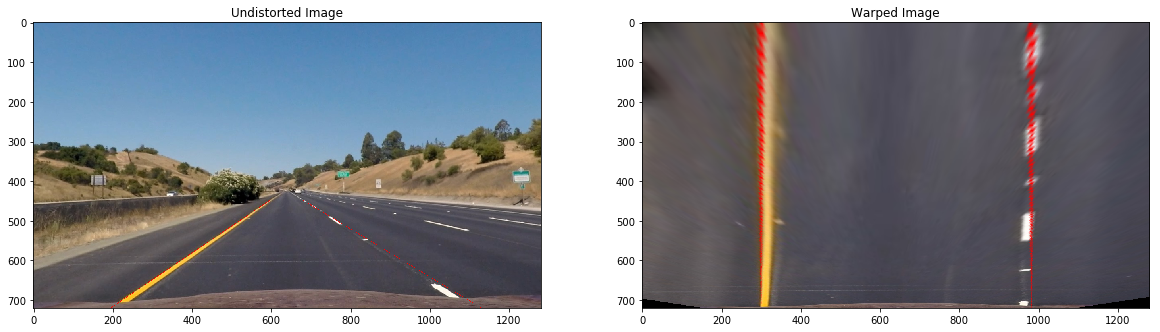

In [107]:
# Perspective Transform
def warp(dst):
    source_pts = np.array([ [195, dst.shape[0]], [597, 448], [680, 448], [1130, dst.shape[0]] ], np.float32)
    offset = 300
    dst_pts = np.array([ [0 + offset, dst.shape[0]], [0 + offset, 0], [dst.shape[1] - offset, 0], [dst.shape[1] - offset, dst.shape[0]] ], np.float32)
    cv2.line(dst, (195, dst.shape[0]), (597, 448), (255, 0, 0), 1)
    cv2.line(dst, (680, 448), (1130, dst.shape[0]), (255, 0, 0), 1)
    M = cv2.getPerspectiveTransform(source_pts, dst_pts)
    warped_dst = cv2.warpPerspective(dst, M, (dst.shape[1], dst.shape[0]), flags = cv2.INTER_LINEAR)
    f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
    ax1.set_title("Undistorted Image")
    ax1.imshow(dst, cmap = "gray")
    ax2.set_title("Warped Image")
    ax2.imshow(warped_dst, cmap = "gray")
warp(dst)

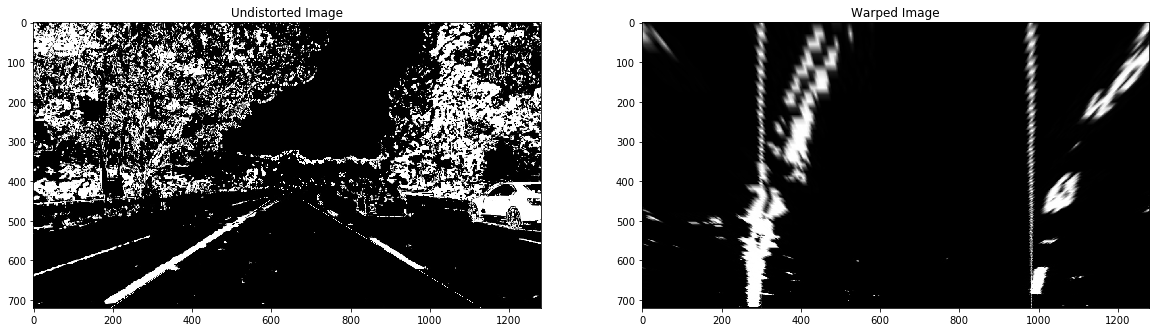

In [108]:
# Test undistortion and warping on thresholded images
import matplotlib.image as mpimg
imagepaths = glob.glob("C:/Users/lenovo/Documents/SDCND/Advanced-Lane-Finding/Images/thresholded_images/*.jpg")
for k, fname in enumerate(imagepaths):
    image = mpimg.imread(fname)
    new = undistort(image)
    warped = warp(new)
    break
    